## A CLASSIFICATION PROJECT - THE SEPSIS CASE STUDY

#### BUSINESS UNDERSTANDING
Sepsis is a critical health condition with significant implications for patient outcomes and healthcare systems. Predicting and managing sepsis effectively can reduce mortality rates, improve patient recovery, and decrease healthcare costs. This project aims to leverage machine learning models and FastAPI to predict sepsis, thereby enabling timely interventions and enhancing clinical decision-making. This project aims to enhance the early detection and management of sepsis through a machine learning-based predictive model deployed as an API with FastAPI. By addressing a critical healthcare challenge, the project seeks to improve patient outcomes, optimize resource utilization, and provide valuable decision support for healthcare providers. The success of the project will be measured by its impact on clinical practice and its ability to deliver timely, accurate predictions in a real-world healthcare setting.

#### Business Objectives
1. Early Detection: Develop a predictive model to identify patients at risk of sepsis early, allowing for prompt intervention and treatment.

2. Reduce Mortality Rates: Use the predictive model to minimize the time to diagnosis and treatment, thereby reducing sepsis-related deaths.

3. Optimize Resource Utilization: Allocate medical resources more efficiently by identifying high-risk patients, reducing unnecessary testing and treatments for low-risk individuals.

4. Enhance Clinical Decision-Making: Provide healthcare professionals with reliable tools to support clinical decisions, improving patient care quality.

##### HYPOTHESIS
NULL HYPOTHESIS: There is no significant relationship between sepsis and PRG (Plasma/glucose).

ALTERNATE HYPOTHESIS: There is a significant relationship between sepsis and PRG (Plasma /glucose).

#### ANALYTICAL QUESTIONS
1. How is the distribution of plasma glucose (PRG) among patients who develop sepsis versus those who don't?

2. What is the correlation between blood pressure (PR) and the likelihood of sepsis development?

3. Are there any noticeable differences in body mass index (M11) between patients with and without sepsis?

4. How does age vary between patients who develop sepsis and those who don't?

5. Is there a pattern in the blood work results (PL, SK, TS, BD2) that distinguishes patients with sepsis from those without?

#### DATA UNDERSTANDING

#### Load the necessary packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats
from tabulate import tabulate
#Machine Learning Packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import joblib
import warnings
warnings.filterwarnings('ignore')


#### Load the datasets

In [9]:
#Load training dataset
df = pd.read_csv("Datasets/Paitients_Files_Train.csv")
df

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


#### Data Description: A summary of the dataset attributes:
* ID: number to represent patient ID

* PRG: Plasma glucose

* PL: Blood Work Result-1 (mu U/ml)

* PR: Blood Pressure (mm Hg)

* SK: Blood Work Result-2 (mm)

* TS: Blood Work Result-3 (mu U/ml)

* M11: Body mass index (weight in kg/(height in m)^2

* BD2: Blood Work Result-4 (mu U/ml)

* Age: patients age (years)

* Insurance: If a patient holds a valid insurance card

* Sepsis: Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

In [12]:
#Load the test data
test_df = pd.read_csv("Datasets/Paitients_Files_Test.csv")
test_df

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0
...,...,...,...,...,...,...,...,...,...,...
164,ICU200773,10,101,76,48,180,32.9,0.171,63,1
165,ICU200774,2,122,70,27,0,36.8,0.340,27,1
166,ICU200775,5,121,72,23,112,26.2,0.245,30,1
167,ICU200776,1,126,60,0,0,30.1,0.349,47,1


In [13]:
#Check cell values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [16]:
#Check for duplicates
df.duplicated().sum()

np.int64(0)

* This shows there are no duplicates in the dataset

In [17]:
#Check missing values
df.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

* This shows there are no missing values in the dataset

In [18]:
#Check statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


In [19]:
#Check Unique Values
def check_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values in column '{column}': {unique_values}")

check_unique_values(df)

Unique values in column 'ID': ['ICU200010' 'ICU200011' 'ICU200012' 'ICU200013' 'ICU200014' 'ICU200015'
 'ICU200016' 'ICU200017' 'ICU200018' 'ICU200019' 'ICU200020' 'ICU200021'
 'ICU200022' 'ICU200023' 'ICU200024' 'ICU200025' 'ICU200026' 'ICU200027'
 'ICU200028' 'ICU200029' 'ICU200030' 'ICU200031' 'ICU200032' 'ICU200033'
 'ICU200034' 'ICU200035' 'ICU200036' 'ICU200037' 'ICU200038' 'ICU200039'
 'ICU200040' 'ICU200041' 'ICU200042' 'ICU200043' 'ICU200044' 'ICU200045'
 'ICU200046' 'ICU200047' 'ICU200048' 'ICU200049' 'ICU200050' 'ICU200051'
 'ICU200052' 'ICU200053' 'ICU200054' 'ICU200055' 'ICU200056' 'ICU200057'
 'ICU200058' 'ICU200059' 'ICU200060' 'ICU200061' 'ICU200062' 'ICU200063'
 'ICU200064' 'ICU200065' 'ICU200066' 'ICU200067' 'ICU200068' 'ICU200069'
 'ICU200070' 'ICU200071' 'ICU200072' 'ICU200073' 'ICU200074' 'ICU200075'
 'ICU200076' 'ICU200077' 'ICU200078' 'ICU200079' 'ICU200080' 'ICU200081'
 'ICU200082' 'ICU200083' 'ICU200084' 'ICU200085' 'ICU200086' 'ICU200087'
 'ICU200088' 'ICU2000

#### Rename the Columns

In [24]:
df = df.rename(columns={'PRG': 'Plasma Glucose', 'PL': 'Blood Work Result-1',
                        'PR': 'Blood Pressure','SK': 'Blood Work Result-2',
                        'TS': 'Blood Work Result-3', 'M11': 'Body Mass Index',
                        'BD2': 'Blood Work Result-4', 'Sepssis': 'Sepsis'})

In [32]:
#Preview the dataset
df.head()

,ID,Plasma Glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body Mass Index,Blood Work Result-4,Age,Insurance,Sepsis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


#### Univariate Analysis

##### The Distribution of the Categorical Variables

Sepsis
Negative    391
Positive    208
Name: count, dtype: int64
Insurance
1    411
0    188
Name: count, dtype: int64


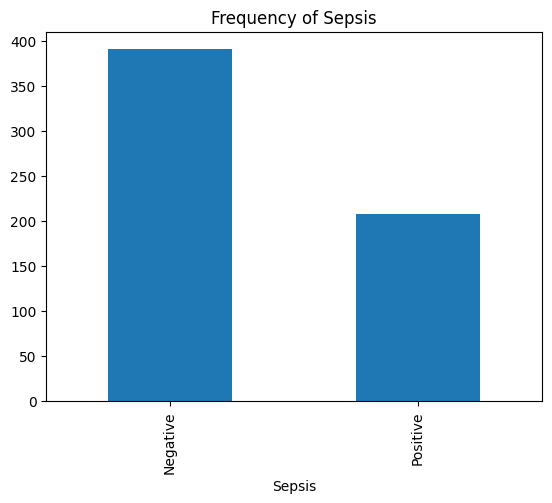

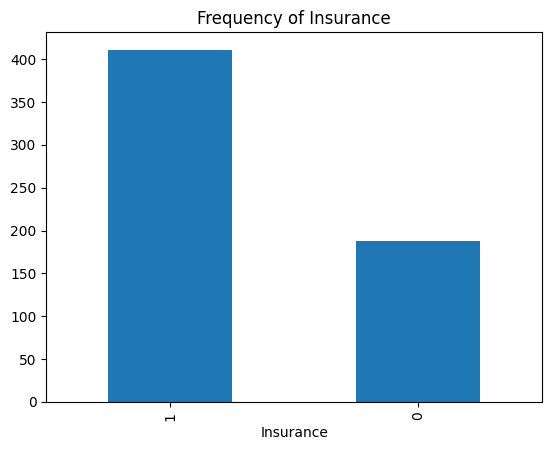

In [27]:
import matplotlib.pyplot as plt
#Frequency tables
print(df['Sepsis'].value_counts())
print(df['Insurance'].value_counts())

#Bar charts
df['Sepsis'].value_counts().plot(kind='bar')
plt.title('Frequency of Sepsis')
plt.show()

df['Insurance'].value_counts().plot(kind='bar')
plt.title('Frequency of Insurance')
plt.show()

##### Distribution of Numerical Variables

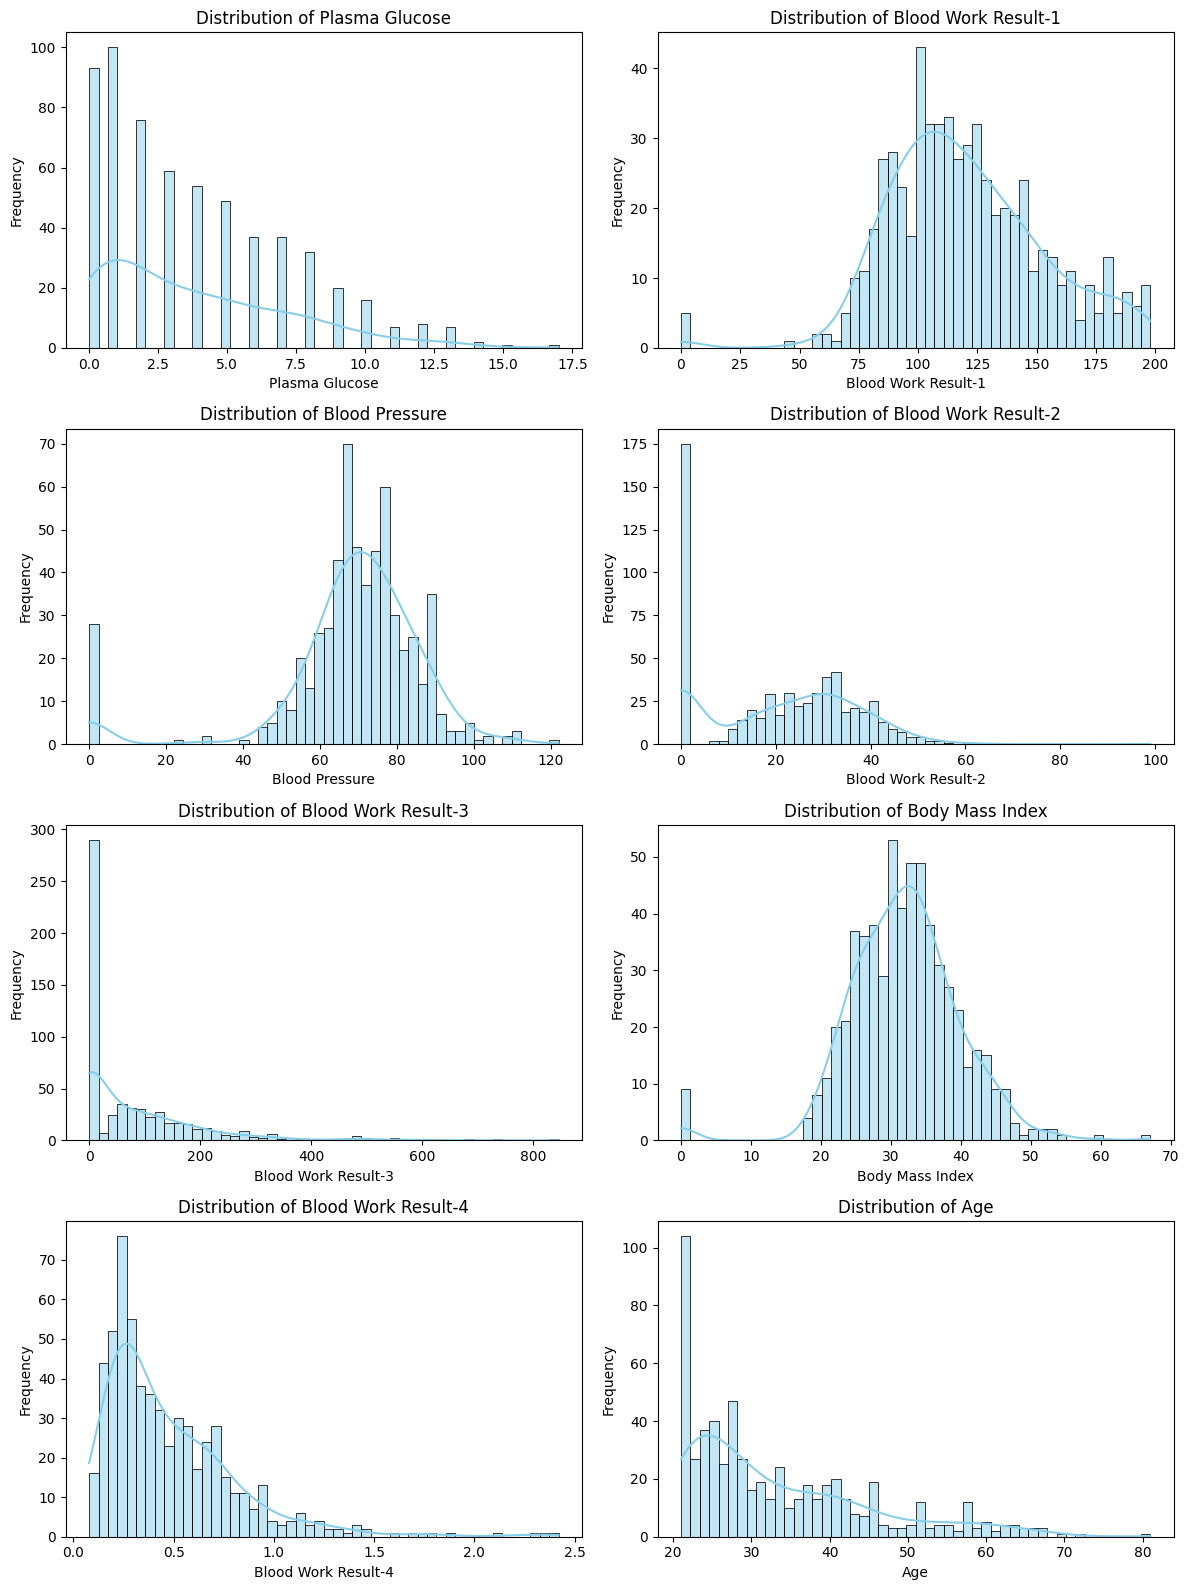

In [30]:
#Create histograms with KDE plots to visualize distribution of other columns
cols = ['Plasma Glucose', 'Blood Work Result-1', 'Blood Pressure', 'Blood Work Result-2', 'Blood Work Result-3', 'Body Mass Index', 'Blood Work Result-4', 'Age']

#Calculate the number of rows needed
num_rows = len(cols) // 2 + len(cols) % 2

#Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 4 * num_rows))

#Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

#Iterate over columns and create histograms with KDE plots
for i, column in enumerate(cols):
    sns.histplot(df[column], kde=True, bins=50, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

#Remove empty subplots if the number of subplots is odd
if len(cols) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

#### Observations
##### Distribution results:
* Plasma Glucose, Blood Work Result-1, Blood Work Result-2, Blood Work Result-3, Blood Work Result-4 and Age are rightly-skewed.
* Blood Pressure and Body Mass Index are normally distributed.
##### Presence of outliers:
* Outliers are evident in several variables, particularly in the blood work results (1, 2, 3, and 4). These outliers warrant further investigation to determine if they are errors, genuine extreme values, or indicative of a specific subgroup within the dataset.  